# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [39]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = './traffic-signs-data/train.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [40]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
number_of_classes_set = set(y_train)
n_classes = len(number_of_classes_set)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

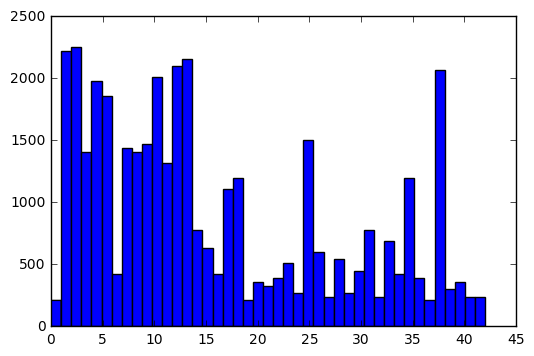

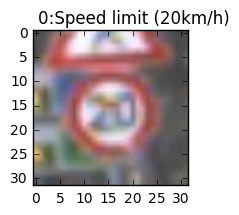

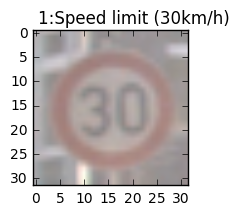

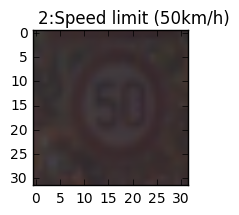

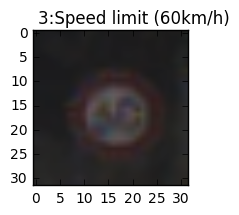

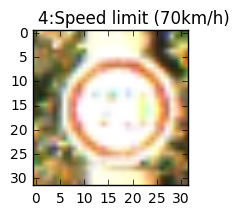

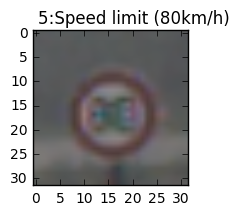

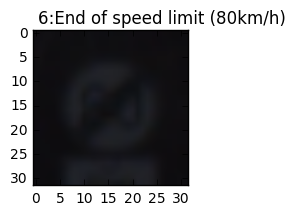

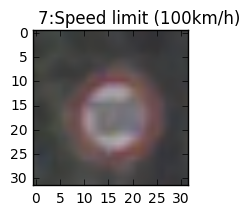

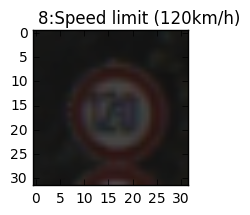

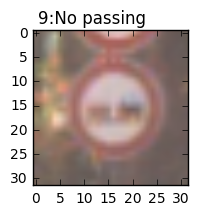

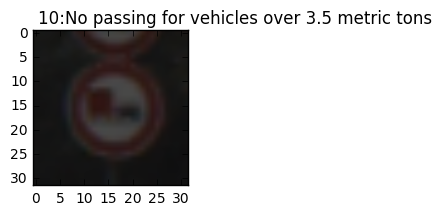

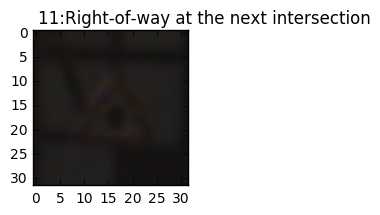

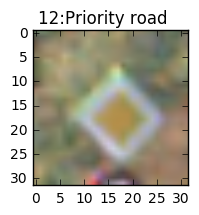

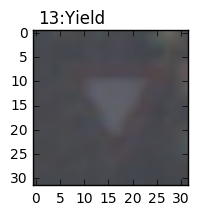

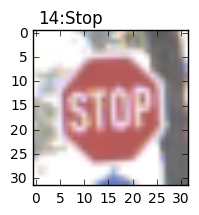

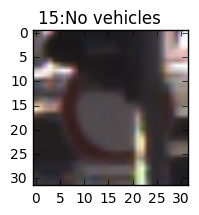

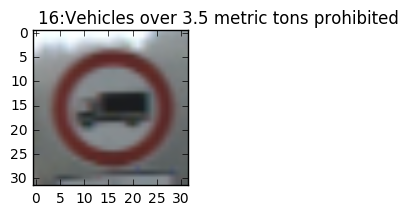

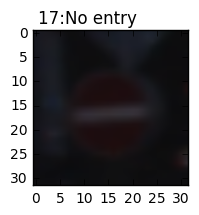

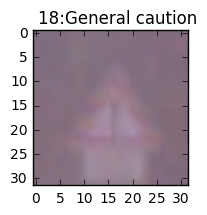

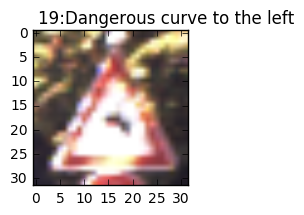

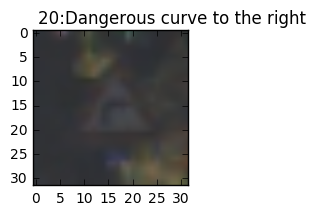

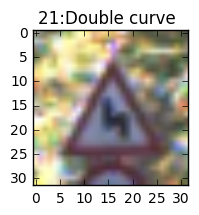

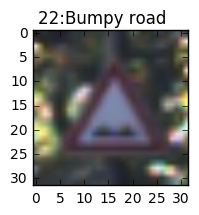

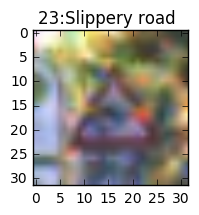

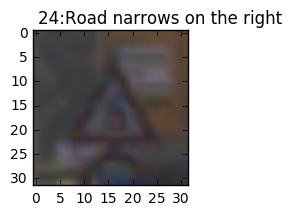

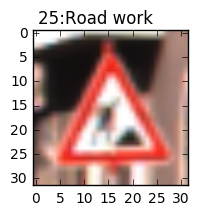

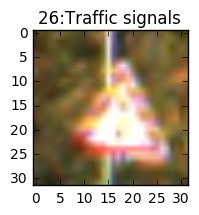

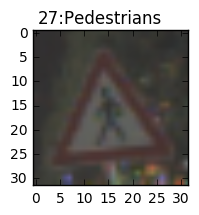

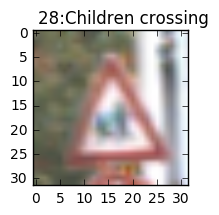

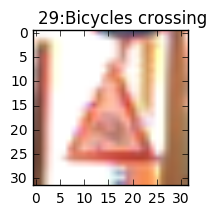

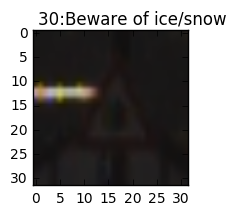

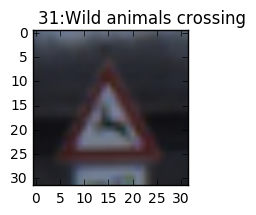

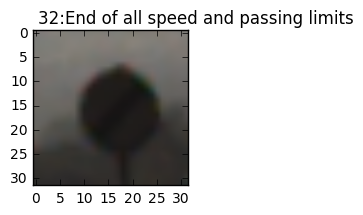

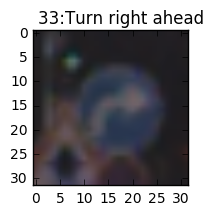

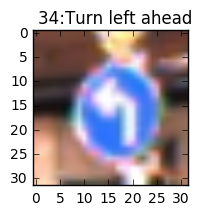

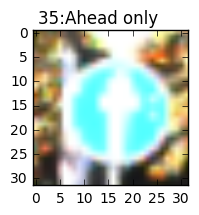

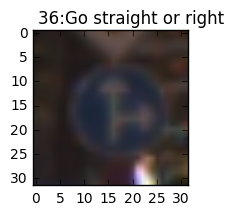

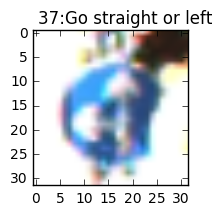

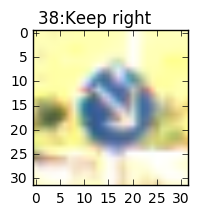

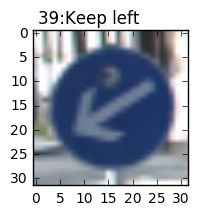

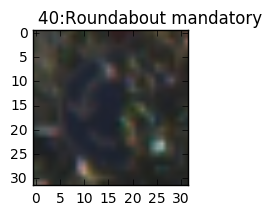

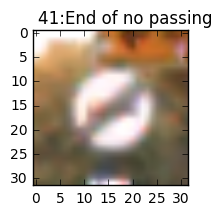

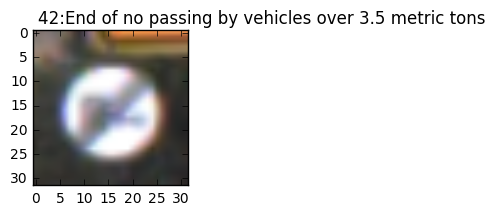

In [43]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt

import numpy as np
# Visualizations will be shown in the notebook.
%matplotlib inline

def get_traffic_sign_name(label):
    if label == 0:
        return "0:Speed limit (20km/h)"
    if label == 1:
        return "1:Speed limit (30km/h)"
    if label == 2:
        return "2:Speed limit (50km/h)"
    if label == 3:
        return "3:Speed limit (60km/h)"
    if label == 4:
        return "4:Speed limit (70km/h)"
    if label == 5:
        return "5:Speed limit (80km/h)"
    if label == 6:
        return "6:End of speed limit (80km/h)"
    if label == 7:
        return "7:Speed limit (100km/h)"
    if label == 8:
        return "8:Speed limit (120km/h)"
    if label == 9:
        return "9:No passing"
    if label == 10:
        return "10:No passing for vehicles over 3.5 metric tons"
    if label == 11:
        return "11:Right-of-way at the next intersection"
    if label == 12:
        return "12:Priority road"
    if label == 13:
        return "13:Yield"
    if label == 14:
        return "14:Stop"
    if label == 15:
        return "15:No vehicles"
    if label == 16:
        return "16:Vehicles over 3.5 metric tons prohibited"
    if label == 17:
        return "17:No entry"
    if label == 18:
        return "18:General caution"
    if label == 19:
        return "19:Dangerous curve to the left"
    if label == 20:
        return "20:Dangerous curve to the right"
    if label == 21:
        return "21:Double curve"
    if label == 22:
        return "22:Bumpy road"
    if label == 23:
        return "23:Slippery road"
    if label == 24:
        return "24:Road narrows on the right"
    if label == 25:
        return "25:Road work"
    if label == 26:
        return "26:Traffic signals"
    if label == 27:
        return "27:Pedestrians"
    if label == 28:
        return "28:Children crossing"
    if label == 29:
        return "29:Bicycles crossing"
    if label == 30:
        return "30:Beware of ice/snow"
    if label == 31:
        return "31:Wild animals crossing"
    if label == 32:
        return "32:End of all speed and passing limits"
    if label == 33:
        return "33:Turn right ahead"
    if label == 34:
        return "34:Turn left ahead"
    if label == 35:
        return "35:Ahead only"
    if label == 36:
        return "36:Go straight or right"
    if label == 37:
        return "37:Go straight or left"
    if label == 38:
        return "38:Keep right"
    if label == 39:
        return "39:Keep left"
    if label == 40:
        return "40:Roundabout mandatory"
    if label == 41:
        return "41:End of no passing"
    if label == 42:
        return "42:End of no passing by vehicles over 3.5 metric tons"
    
    return "Not Defined"

plt.rcParams.update({'figure.max_open_warning': 0})
plt.hist(train['labels'],bins=n_classes)
plt.show()
for sign in number_of_classes_set:
    index = np.where(y_train == sign)
#     index = y_train.where(sign)
    image = X_train[index[0][0]]
#     print("Index:",index[0][0])
#     plt.figure.max_open_warning = 100
    plt.figure(figsize=(2,2))
    sign_name = get_traffic_sign_name(y_train[index[0][0]])
    plt.text(0.5, -2, sign_name, fontsize=12)
    plt.imshow(image)
    





    
    


    
    

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** I shuffled the data. Because use the un-shuffled data, which has certain order, might have a effect on how well the network being trained.

In [ ]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** I just used the training data and testing data for training and testing. I did not seperate validation data from training data for validation.

In [37]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten
EPOCHS = 20
BATCH_SIZE = 64
def LeNet(x):
    mu = 0
    sigma = 0.01
    weight1 = tf.Variable(tf.truncated_normal(shape=(5,5,3,6),mean=mu,stddev=sigma))
    bias1 = tf.Variable(tf.zeros(6))
    layer1 = tf.nn.conv2d(x, weight1, strides=[1,1,1,1], padding='VALID') + bias1
    
    layer1 = tf.nn.relu(layer1)
    
    layer1 = tf.nn.max_pool(layer1, ksize=[1,2,2,1],strides=[1,2,2,1],padding = 'VALID')
    
    weight2 = tf.Variable(tf.truncated_normal(shape=(5,5,6,16),mean=mu,stddev=sigma))
    bias2 = tf.Variable(tf.zeros(16))
    layer2 = tf.nn.conv2d(layer1, weight2, strides = [1,1,1,1],padding='VALID') + bias2
    
    layer2 = tf.nn.relu(layer2)
    
    layer2 = tf.nn.max_pool(layer2,ksize=[1,2,2,1], strides = [1,2,2,1], padding = 'VALID')
    
    fc0 = flatten(layer2)
    
    fc1_weight = tf.Variable(tf.truncated_normal(shape=(400,120),mean=mu,stddev=sigma))
    fc1_bias = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(fc0, fc1_weight)+fc1_bias
    
    fc1 = tf.nn.relu(fc1)
    
    fc2_weight = tf.Variable(tf.truncated_normal(shape=(120,84),mean=mu,stddev=sigma))
    fc2_bias = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(fc1, fc2_weight) + fc2_bias
    
    fc2 = tf.nn.relu(fc2)
    
    fc3_weight = tf.Variable(tf.truncated_normal(shape=(84,43),mean=mu,stddev=sigma))
    fc3_bias = tf.Variable(tf.zeros(43))
    
    return (tf.matmul(fc2, fc3_weight) + fc3_bias)


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._

I used the LeNet-5 neural network architecture. The LeNet architecture accepts a 32x32x3 image. There are 5 layers in the architecture.

Layer 1: Convolutional. The input size is 32x32x3 and output size is 28x28x6 
         Activation:RELU Pooling: Max Pooling. The input size 28x28x6 and the output size is 14x14x6
         
Layer 2: Convolutional. The input size is 14x14x6 and output size is 10x10x16
         Activation:RELU Pooling: Max Pooling. The input size is 10x10x16 and output size is 5x5x16
         
Layer 3: Fully Connected. Activation:RELU Input:400 Output:120

Layer 4: Fully Connected. Activation:RELU Input:120 Output:84

Layer 5: Fully Connected(Logits) Input:84 Output:43


**Answer:**

In [26]:
### Train your model here.
### Feel free to use as many code cells as needed.

#The following code is from LeNet Lab
x = tf.placeholder(tf.float32, (None,32,32,3))
y = tf.placeholder(tf.int32,(None))
one_hot_y = tf.one_hot(y,43)

# learning_rate = 0.001
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
prediction = tf.argmax(logits, 1)
softmax_prediction = tf.nn.softmax(logits)

# optimizer = tf.train.AdamOptimizer(learning_rate = 0.0005)
# optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
optimizer = tf.train.AdadeltaOptimizer(learning_rate = 3)
training_operation = optimizer.minimize(loss_operation)



correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


In [38]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        test_accuracy = evaluate(X_test, y_test)
        print("EPOCH {} ...".format(i+1))
        print("Test Accuracy = {:.3f}".format(test_accuracy))
        print()
        
    saver.save(sess, '.\lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Test Accuracy = 0.781

EPOCH 2 ...
Test Accuracy = 0.864

EPOCH 3 ...
Test Accuracy = 0.873

EPOCH 4 ...
Test Accuracy = 0.900

EPOCH 5 ...
Test Accuracy = 0.907

EPOCH 6 ...
Test Accuracy = 0.895

EPOCH 7 ...
Test Accuracy = 0.913

EPOCH 8 ...
Test Accuracy = 0.917

EPOCH 9 ...
Test Accuracy = 0.917

EPOCH 10 ...
Test Accuracy = 0.910

EPOCH 11 ...
Test Accuracy = 0.915

EPOCH 12 ...
Test Accuracy = 0.915

EPOCH 13 ...
Test Accuracy = 0.901

EPOCH 14 ...
Test Accuracy = 0.919

EPOCH 15 ...
Test Accuracy = 0.911

EPOCH 16 ...
Test Accuracy = 0.917

EPOCH 17 ...
Test Accuracy = 0.917

EPOCH 18 ...
Test Accuracy = 0.913

EPOCH 19 ...
Test Accuracy = 0.916

EPOCH 20 ...
Test Accuracy = 0.919

Model saved


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** I chose Ada Delta Optimizer. Batch size 64. and Epochs are 20. Hyperparameters, mu is 0 and sigma is 0.01

"Please discuss how did you choose the optimzer. (Missed Answer)"
The following image is from http://cs231n.github.io/neural-networks-3/
<img src="opt1.gif">
<img src="opt2.gif">

From the the two animation above, we can find out the the Ada Delta Optimizer is the fastest to find the optimization. So I chose the Ada Delta Optimizer.

"Please discuss how did you tell a convolutional layer is well suited for this problem. (Missed Answer)"
From my view point I will experiment about adding and removing a convolutional layer to see whether it increase or decrease the performance. I think it is more experimental to me than explain it theoretically. I learned from the CarND lessons that LeNet is a CNN which is great for image classification so I used LeNet architecture.

"Please discuss how did you choose the particular activation (Missed Answer)"
Frankly, I do not know how to choose particular activation, I just followed the LeNet architecture and used activation layer in LeNet.

"Please discuss how did you tune the hyperparameter. (Missed Answer)"
I know the mu hyperparameter should be 0. So I tried various value for sigma, I tried 1, 0, 0.5, 0.1, 0.05, 0.01 and 0.001. I find out that when the sigma is 0.01, the prediction is the most accurate.


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** I chose the LeNet CNN Architecture. I also used the code from LeNet Lab. From the CNN lessons, I learned from the expert, Vincent, that Convolutional Neural Networks can help people dramatically improve performance of image classification. I can use the code from LeNet Lab, so I chose LeNet CNN Architecure.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', 'Thumbs.db']


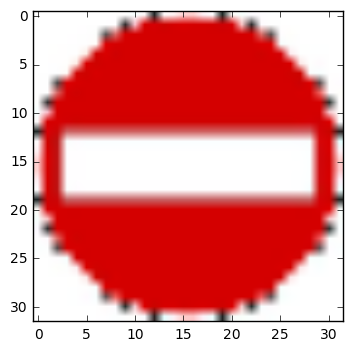

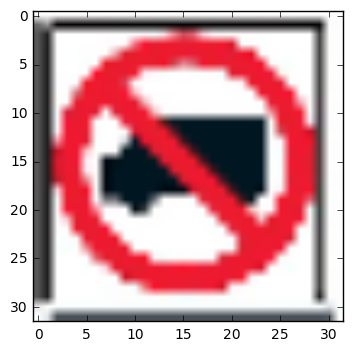

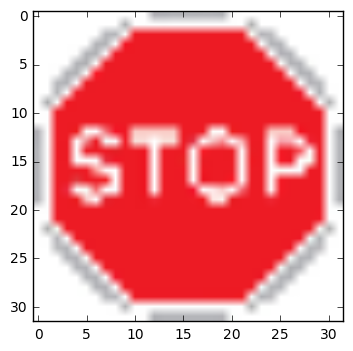

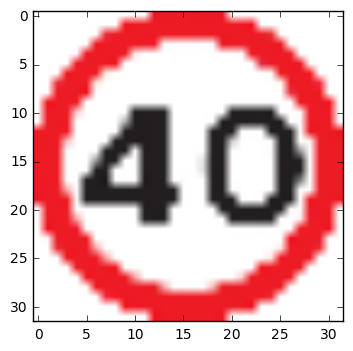

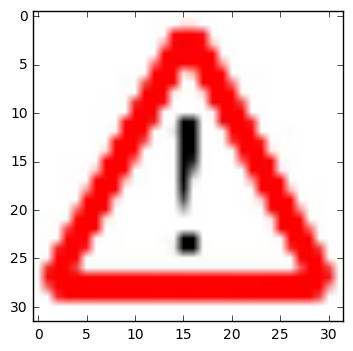

In [28]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
# import matplotlib.image as mpimg
from scipy.misc import imread
import numpy as np
import cv2
import os
from PIL import Image

image_list = os.listdir("./Traffic-Signs from Internet/")

pre_test_set = np.array([]).reshape([-1,32,32,3])
size = 32, 32
print(image_list)
for i in range(len(image_list)):
    if image_list[i].endswith('.jpg'):
        traffic_sign = imread("./Traffic-Signs from Internet/" + image_list[i])
#         traffic_sign = mpimg.imread("./Traffic-Signs from Internet/" + image_list[x])
        
#         traffic_sign = cv2.imread("./Traffic-Signs from Internet/" + image_list[x],3)
        
        resized_image = cv2.resize(traffic_sign,size)
#         print(image_list[i], resized_image.shape)
        pre_test_set = np.append(pre_test_set, resized_image.reshape([-1,32,32,3]), axis=0)
        plt.figure()
        plt.imshow(resized_image)


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
Yes, for image, 1.jpg which is No Entry, the shape is different from the Germany Traffic Sign. 
For image, 2.jpg which is No Truck, there is no corresponding image class in the Germany Traffic Sign set.
For image, 4.jpg which is Speed limit (40km/h), there is no corresponding image class, 40km/h speed limit, in the Germany Traffic Sign set.
Above all, that's maybe why the accuracy of the prediction of the signs is not very high.


In [29]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

# test_set = np.array([])
# x = tf.placeholder(tf.float32, (None, 32, 32, 3))
# for i in pre_test_set:
#     test_set = np.append(test_set, i.astype(np.float32))

test_set = pre_test_set
# y_set = np.zeros(11)

#This will result in errors that I cannot fix. Can you provide me some clues on how to fix it? The comment is what I want to do.

#I want to restore the model that I have trained from previous code cell.
with tf.Session() as session:
    saver.restore(session, tf.train.latest_checkpoint('.'))
    
    #I want to feed the images downloaded from internet to the trained model and get the prediction.
    pred = session.run(prediction, feed_dict ={x:test_set})

    pred_vals = session.run(softmax_prediction, feed_dict ={x:test_set})
    print(pred_vals)
    top_k = session.run(tf.nn.top_k(pred_vals, 5, sorted=True))
    print(top_k)
    
    print(pred)
    

[[  4.72831455e-26   3.61849544e-28   0.00000000e+00   3.22989343e-35
    1.78031001e-36   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   4.06884609e-37   3.76334079e-02   2.84740296e-36
    0.00000000e+00   9.62366581e-01   7.51856399e-33   0.00000000e+00
    3.72921565e-36   0.00000000e+00   8.88503693e-23   0.00000000e+00
    0.00000000e+00   5.30693683e-30   4.14212490e-36   0.00000000e+00
    0.00000000e+00   2.64480461e-35   0.00000000e+00   0.00000000e+00
    0.00000000e+00   1.67261424e-34   0.00000000e+00   0.00000000e+00
    2.38939224e-34   0.00000000e+00   3.86100282e-36   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   2.29474282e-37   0.00000000e+00   5.44761518e-26
    6.65838417e-26   3.30340366e-10   6.00258413e-25   9.98986542e-01
    4.87201294e-04   2.82589313e-27   7.88121759e-34   0.00000000e+00
    0.00000000e+00   0.00000000e+00 

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**
No, the accuracy of the model is only 60%. Maybe partly the reason is because the traffic sign downloaded from Internet is not in the Germany Traffic Sign system. So the model has never seen it before.

|Signsfrom the Internet|Sign Name|Prediction Correctness|
|:----|:-------|:-------|
|1.jpg|No Entry|Correct|
|2.jpg|No Truck|Incorrect|
|3.jpg|Stop|Correct|
|4.jpg|Speed limit (40km/h)|Incorrect|
|5.jpg|General caution|Correct|

So the traffic sign the model correctly predicted are 1.jpg which is no entry, 3.jpg which is the stop sign and the 5.jpg which is the general caution.

From the prediction I did to the images downloaded from the Internet, the testing accuracy is 60%, however, the model prediction accuracy on the training set was 92% at the highest point. As a result, I believe my model did not perform well in the real world situation. The possible reasons would be there are other sets of traffic signs which are not in the Germany Traffic Sign Set. The classifier has never seen and trained on those traffic sign before, so it won't recognize those traffic signs.


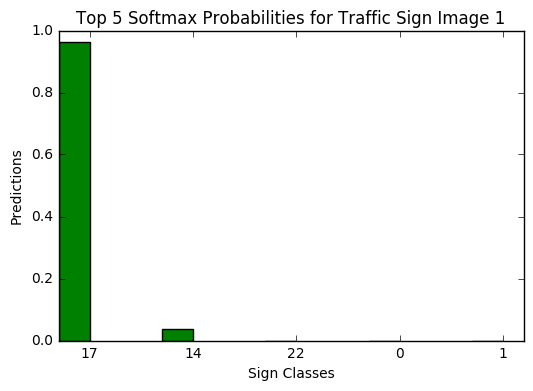

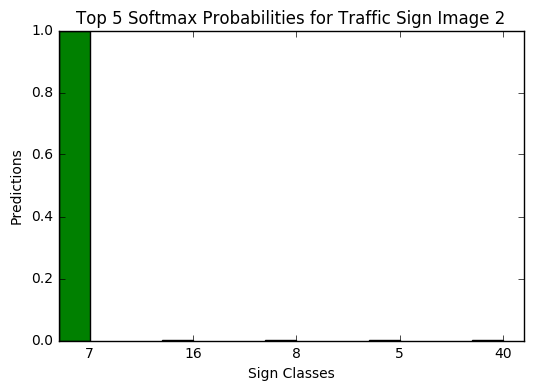

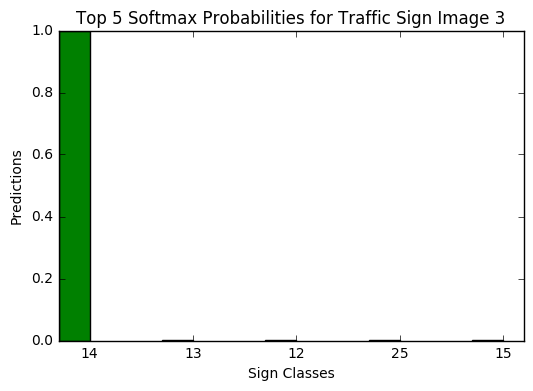

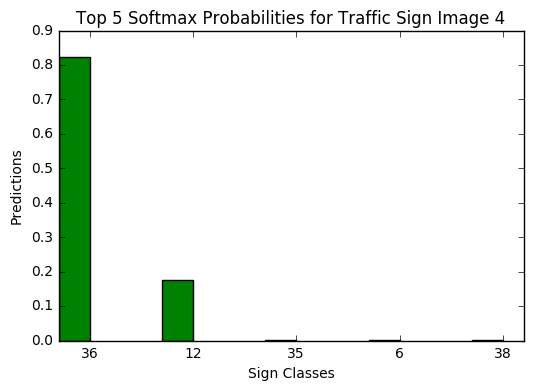

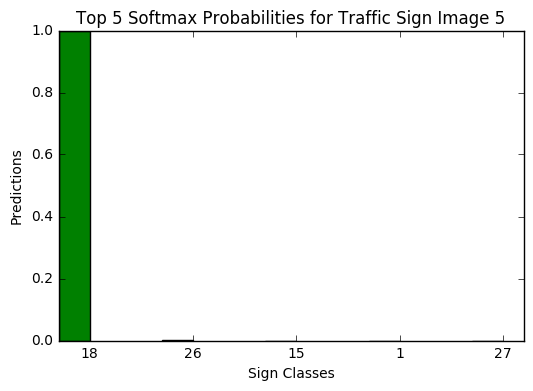

In [35]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
values = top_k[0]
index = top_k[1]

bar = np.arange(5)
for i in range(5):
    plt.figure(i)
    bar_values = values[i]
    plt.bar(bar, bar_values, 0.30, color='g')
    plt.ylabel('Predictions')
    plt.xlabel('Sign Classes')
    plt.title('Top 5 Softmax Probabilities for Traffic Sign Image {}'.format(str(i+1)))
    plt.xticks(bar+0.30, tuple(index[i]))
plt.show()




### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

For question "Which predictions is the model certain of? Uncertain?" You can read it from the bar plot above to know which prediction is the model certain of and which prediction is uncertain.

|Signsfrom the Internet|Sign Name|Prediction Correctness In Top 5|
|:----|:-------|:-------|
|2.jpg|No Truck|No|
|4.jpg|Speed limit (40km/h)|No, but the prediction 6 is close|

For the question "Which predictions is the model certain of? Uncertain?" If the answer above does not answer this question, could you please explain more what should I say might answer that questions? I felt I do not really understand the question "Which predictions is the model certain of? Uncertain?" Could you explain more?

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.
    
    
